# Zero Shot Classification - BART - Multi Label Classification - Pipeline

In this example, I have leveraged the movie description data with the movie synopsis and the movie name as text inputs to predict the one of the ten genres.

I have leveraged BART pre-trained model to classify the genres.

The purpose of this exercise is to check on the accuracy of the classification without finetuning the data.

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00


In [2]:
from transformers import pipeline

In [4]:
classifier_pipeline = pipeline ("zero-shot-classification", model = "facebook/bart-large-mnli", device = 0)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/train.csv')
train_data.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


In [7]:
concatenated_train_text = train_data['synopsis'] + " " + train_data['movie_name']
concatenated_train_text.head(1)

0    A young scriptwriter starts bringing valuable ...
dtype: object

In [8]:
concatenated_train_text[0]

'A young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon. Selling them makes him rich. Super Me'

In [9]:
unique_labels = train_data['genre'].unique().tolist()
unique_labels

['fantasy',
 'horror',
 'family',
 'scifi',
 'action',
 'crime',
 'adventure',
 'mystery',
 'romance',
 'thriller']

In [10]:
classifier_pipeline(concatenated_train_text[0], unique_labels, multi_label = True)

{'sequence': 'A young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon. Selling them makes him rich. Super Me',
 'labels': ['action',
  'adventure',
  'thriller',
  'fantasy',
  'horror',
  'scifi',
  'mystery',
  'crime',
  'romance',
  'family'],
 'scores': [0.9177564382553101,
  0.8559474349021912,
  0.8367784023284912,
  0.7320958971977234,
  0.6446102261543274,
  0.41917210817337036,
  0.00839029811322689,
  0.005330925807356834,
  0.002907912014052272,
  0.0024099894799292088]}

In [11]:
output = classifier_pipeline(concatenated_train_text[2], unique_labels)
output

{'sequence': 'This is an educational video for families and family therapists that describes the Behavioral Family Therapy approach to dealing with serious psychiatric illnesses. Behavioral Family Therapy for Serious Psychiatric Disorders',
 'labels': ['family',
  'action',
  'adventure',
  'mystery',
  'scifi',
  'thriller',
  'fantasy',
  'crime',
  'romance',
  'horror'],
 'scores': [0.6935397982597351,
  0.1102374866604805,
  0.07094360142946243,
  0.04280681908130646,
  0.026079656556248665,
  0.022234812378883362,
  0.011221920140087605,
  0.00900478195399046,
  0.008533087559044361,
  0.005398058332502842]}

In [12]:
output['labels'][0]

'family'

I am going to split my training data here into 2 sets and classify the validation dataset using pipeline.

In next post, I am going to use the same split but finetune the model on partial data of train_texts created below by holding certain labels and test the fine-tuned model on val_texts again to compare the accuracies.

In [18]:
#Split the data
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(concatenated_train_text, train_data['genre'].tolist(), test_size=.2, random_state = 100)
len(val_texts)

10800

In [19]:
label_predicted = []

for text in val_texts:
  output = classifier_pipeline(text, unique_labels)
  label_predicted.append(output['labels'][0])
label_predicted[:5]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


['adventure', 'crime', 'action', 'action', 'horror']

In [20]:
len(label_predicted)

10800

In [21]:
len(val_labels)

10800

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(val_labels,label_predicted)

0.21814814814814815

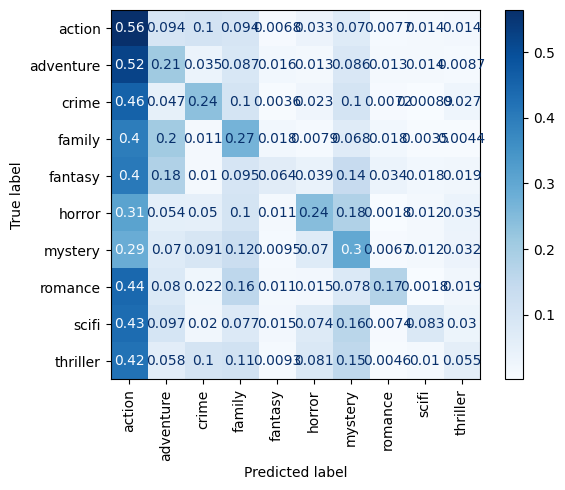

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(val_labels, label_predicted, normalize='true', xticks_rotation='vertical', cmap='Blues')

At an overall level, I am getting an accuracy of 21% for the classification without finetuning the LLM.

See you in the next post!